In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC

C:\Users\Rohit\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline
plt.style.use('seaborn')

In [3]:
cd D:\STUDY\SEM-4\ML\Assignment-1

D:\STUDY\SEM-4\ML\Assignment-1


In [4]:
data = pd.read_csv('student-mat.csv',sep = ';')
df = data
ydata = (data['G3']>11.0).astype(int)
y_df = pd.DataFrame(ydata)
data = data.drop(['G1','G2','G3'], axis = 1)
#data.dtypes
obj_df = data.select_dtypes(include=['object']).copy()
#df_3 = pd.get_dummies(obj_df,columns=['school','sex', 'address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'],drop_first = True)
#data = data.drop(['school','sex', 'address','famsize','Pstatus','dep','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'], axis=1)
df_4 = pd.get_dummies(obj_df,obj_df.columns,drop_first = True)
df_5 = data.drop(obj_df.columns, axis = 1)
xdata = pd.concat([df_5,df_4],axis = 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split( xdata , ydata , test_size=0.33, random_state=42)

In [6]:
from sklearn.metrics import classification_report, confusion_matrix  

In [7]:
def featurebuild(data,n):
    df = []
    if n < data.shape[1]:
        df = data.iloc[:,:n+1]
    elif (n >= data.shape[1]):
        df = data
    if len(df.dtypes[df.dtypes == 'object']) != 0:
        obj_df = df.select_dtypes(include=['object']).copy()
        df_4 = pd.get_dummies(obj_df,obj_df.columns,drop_first = True)
        df_5 = df.drop(obj_df.columns, axis = 1)
        df_6 = pd.concat([df_5,df_4],axis = 1)
        return df_6
    else:
        return df

In [8]:
import warnings
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
transform_list = data.dtypes[data.dtypes != 'object'].index
scaler.fit(X_train[transform_list])
warnings.filterwarnings("ignore")
X_train[transform_list]= scaler.transform(X_train[transform_list])  
X_test[transform_list]= scaler.transform(X_test[transform_list])

In [9]:
xdata = pd.concat([X_train,X_test],axis = 0)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
neigh = KNeighborsClassifier(n_neighbors=14)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=2,
           weights='uniform')

In [12]:
y_pred = neigh.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[67 10]
 [38 16]]
             precision    recall  f1-score   support

          0       0.64      0.87      0.74        77
          1       0.62      0.30      0.40        54

avg / total       0.63      0.63      0.60       131



Error rate vs number of neighbors KNN Learning curve

In [14]:
error_test = []
error_train = []

# Calculating error for K values between 1 and 10
for i in range(1, 20):   
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    pred_train = knn.predict(X_train)
    error_test.append(np.mean(pred_i != y_test))
    error_train.append(np.mean(pred_train != y_train))

Text(0,0.5,'Mean Error')

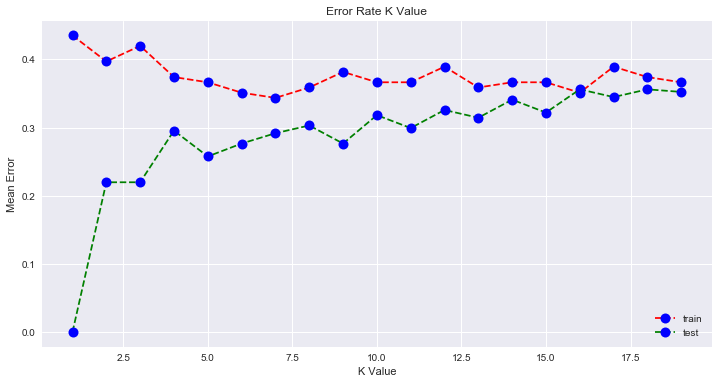

In [56]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), error_test, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.plot(range(1, 20), error_train, color='green', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.legend(['train', 'test'], loc='lower right')
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

Accuracy of KNN with Training dataset size

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
box_knn= np.zeros((5,3))
a = [10,25,50,75,100]
for i in range(len(a)):
    X_train_cut = X_train[:int((X_train.shape[0])*a[i]/100)]
    y_train_cut = y_train[:int((y_train.shape[0])*a[i]/100)]
    knn = KNeighborsClassifier(n_neighbors=9)
    knn.fit(X_train_cut,y_train_cut)
    y_cut_pred = knn.predict(X_train_cut)
    y_test_pred = knn.predict(X_test)
    train_acc = accuracy_score(y_train_cut, y_cut_pred)#(confusion_matrix(y_train_cut,y_cut_pred).diagonal()[0]+confusion_matrix(y_train_cut,y_cut_pred).diagonal()[1])/(confusion_matrix(y_train_cut,y_cut_pred).flatten().sum())
    test_acc = accuracy_score(y_test, y_test_pred)#(confusion_matrix(y_test,y_test_pred).diagonal()[0]+confusion_matrix(y_test,y_test_pred).diagonal()[1])/(confusion_matrix(y_test,y_test_pred).flatten().sum())
    box_knn[i][0] = a[i]
    box_knn[i][1] = train_acc
    box_knn[i][2] = test_acc   

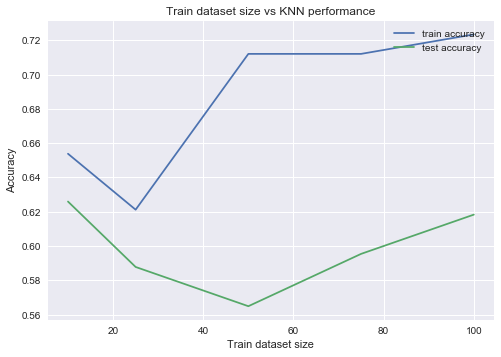

In [18]:
fig_2 =plt.figure()
ax = fig_2.add_subplot(111)
ax.plot(box_knn[:,0],box_knn[:,1],label = 'train accuracy')
ax.plot(box_knn[:,0],box_knn[:,2],label = 'test accuracy')
ax.legend(loc='upper right')
ax.set_title('Train dataset size vs KNN performance')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Train dataset size')
plt.show()

Cross-validation with tuning the hyperparameters in KNN algorithm

In [21]:
data_knn = featurebuild(xdata,50)

In [22]:
scores = np.zeros((21,6))
metric = ['euclidean', 'cityblock','minkowski']
for j in range(1,15):
    #X_svm_test, y_svm_train, y_svm_test = train_test_split( dat , ydata , test_size=0.33, random_state=42)
    for i in range(len(metric)):
        #clf = svm.SVC(kernel=kernel[i])
        #score = cross_val_score(clf, dat, ydata, cv=5)
        model = KNeighborsClassifier(n_neighbors = j, metric=metric[i])
        cv_results = cross_validate(model, data_knn, ydata, cv= 5, return_train_score=True)
        #print(cv_results['train_score'])
        #svclassifier.fit(X_svm_train, y_svm_train)
        #y_train_pred = svclassifier.predict(X_svm_train)
        #y_test_pred = svclassifier.predict(X_svm_test)
        #train_acc = (confusion_matrix(y_svm_train,y_train_pred).diagonal()[0]+confusion_matrix(y_svm_train,y_train_pred).diagonal()[1])/(confusion_matrix(y_svm_train,y_train_pred).flatten().sum())
        #test_acc = (confusion_matrix(y_svm_test,y_test_pred).diagonal()[0]+confusion_matrix(y_svm_test,y_test_pred).diagonal()[1])/(confusion_matrix(y_svm_test,y_test_pred).flatten().sum())
        scores[j][i] = cv_results['train_score'].mean()
        scores[j][i+3] = cv_results['test_score'].mean()

In [23]:
plot_data = np.matrix(scores)

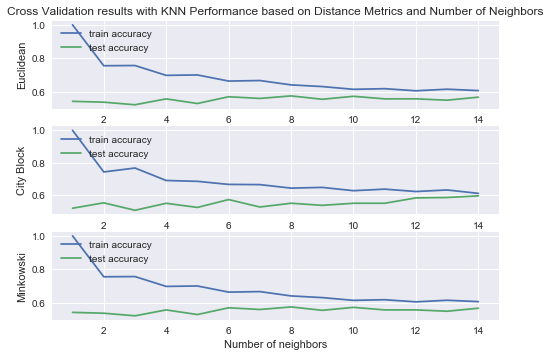

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
xdist = np.arange(1,15,1)
ax1.plot(xdist,plot_data[1:15,0],label = 'train accuracy')
ax1.plot(xdist,plot_data[1:15,3],label = 'test accuracy')
ax1.legend(loc='upper left')
ax1.set_ylabel('Euclidean')
ax2.plot(xdist,plot_data[1:15,1],label = 'train accuracy')
ax2.plot(xdist,plot_data[1:15,4],label = 'test accuracy')
ax2.legend(loc='upper left')
ax2.set_ylabel('City Block')
ax3.plot(xdist,plot_data[1:15,2],label = 'train accuracy')
ax3.plot(xdist,plot_data[1:15,5],label = 'test accuracy')
ax3.legend(loc='upper left')
ax3.set_ylabel('Minkowski')
ax3.set_xlabel('Number of neighbors')
ax1.set_title('Cross Validation results with KNN Performance based on Distance Metrics and Number of Neighbors')
plt.show()

Searching the optimal parameter values for KNN algorithm

In [25]:
from sklearn.grid_search import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
#from imutils import paths
import numpy as np
import argparse
#import imutils
import time
#import cv2
import os

In [26]:
params = {"n_neighbors": np.arange(1, 31, 2),
"metric": ["euclidean", "cityblock"]}

In [27]:
model = KNeighborsClassifier()
grid = RandomizedSearchCV(model, params)
start = time.time()
grid.fit(X_train, y_train)
# evaluate the best randomized searched model on the testing
# data
print("[INFO] randomized search took {:.2f} seconds".format(
time.time() - start))
acc = grid.score(X_test, y_test)
print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))
print("[INFO] randomized search best parameters: {}".format(
grid.best_params_))

[INFO] randomized search took 0.16 seconds
[INFO] grid search accuracy: 66.41%
[INFO] randomized search best parameters: {'n_neighbors': 25, 'metric': 'cityblock'}


ROC curve

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [29]:
model_knn = KNeighborsClassifier(n_neighbors = 17, metric =  'euclidean')
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [30]:
scores = model_knn.predict_proba(X_test)

In [31]:
probs = scores[:, 1]

In [32]:
auc = roc_auc_score(y_test, probs)

In [33]:
auc

0.6772486772486772

In [34]:
fpr, tpr, thresholds = roc_curve(y_test,scores[:,1])

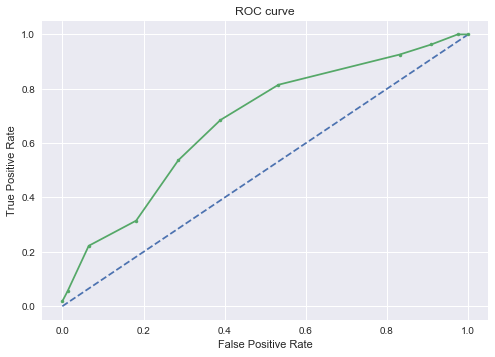

In [35]:
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
# show the plot
plt.show()

ANN

In [36]:
from sklearn.neural_network import MLPClassifier

In [37]:
asdf = (39,39,39)

In [38]:
mlp = MLPClassifier(hidden_layer_sizes=asdf,max_iter=500)
model_ann = mlp.fit(X_train,y_train)

In [39]:
predictions = model_ann.predict(X_test)

In [40]:
predictions_prob = model_ann.predict_proba(X_test)[:,1]

In [41]:
auc = roc_auc_score(y_test, predictions_prob)

In [42]:
auc

0.7147667147667148

In [43]:
fpr, tpr, thresholds = roc_curve(y_test,predictions_prob)

ROC curve

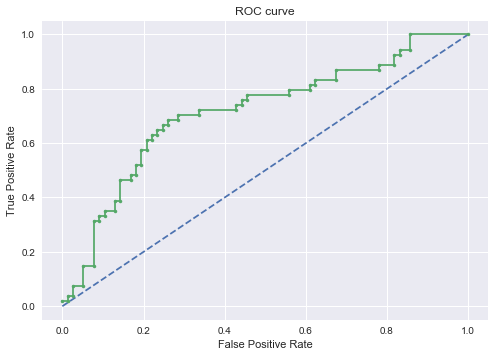

In [44]:
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
# show the plot
plt.show()

In [45]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.76      0.77      0.76        77
          1       0.66      0.65      0.65        54

avg / total       0.72      0.72      0.72       131



In [46]:
from sklearn.metrics import accuracy_score

In [47]:
set_values = [15,15,15,15,15,15]
store = np.zeros((6,2))
for i in range(len(set_values)):
    mlp = MLPClassifier(hidden_layer_sizes=set_values[:i+1],max_iter=500)
    model_ann = mlp.fit(X_train,y_train)
    predictions = model_ann.predict(X_test)
    predictions_train = model_ann.predict(X_train)
    store[i,0] = accuracy_score(y_train, predictions_train)
    store[i,1] = accuracy_score(y_test, predictions)

Text(0.5,1,'Accuracy vs number of hidden layers')

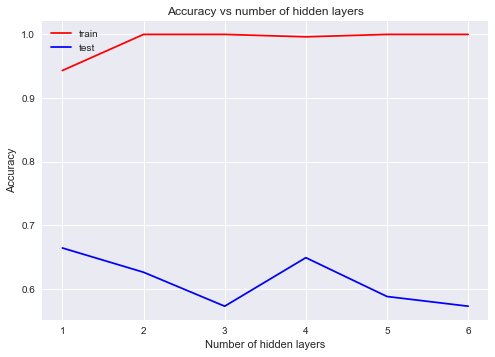

In [54]:
plt.plot(range(1,7),store[:,0], c = 'r')
plt.plot(range(1,7),store[:,1], c = 'b')
plt.xlabel('Number of hidden layers')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.title('Accuracy vs number of hidden layers')

In [49]:
from keras.models import Sequential
from keras.layers import Dense 

Using TensorFlow backend.


In [50]:
model_keras = Sequential()
model_keras.add(Dense(12, input_shape=(39,), kernel_initializer='uniform', activation='relu'))
model_keras.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model_keras.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [51]:
model_keras.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
history = model_keras.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=10, verbose=0)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


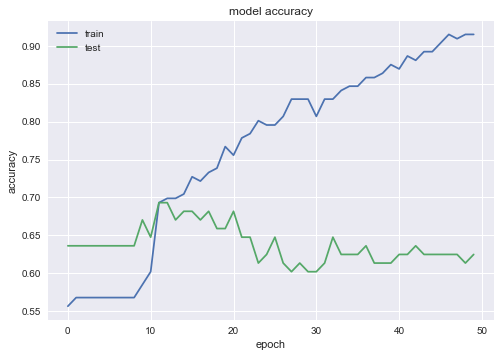

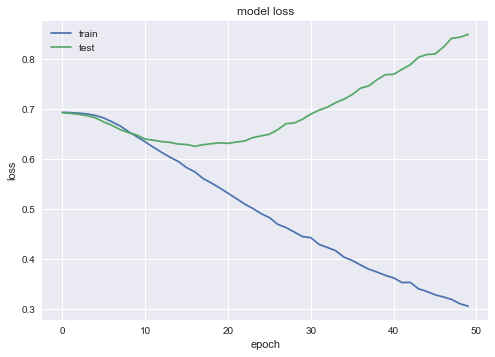

In [53]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()